# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, our task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

#Loading the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load the dataset
cust_data=pd.read_excel('/content/Online Retail.xlsx')

#Analyzing the head and tail of the data set

In [4]:
cust_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [5]:
cust_data.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

In [6]:
cust_data.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
cust_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
cust_data.shape

(541909, 8)

we have 5,41,909 instances and 8 features in our dataset

In [9]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
cust_data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [11]:
# duplicate
len(cust_data[cust_data.duplicated()])

5268

In [12]:
# Dropping Duplicate Rows
cust_data=cust_data.drop_duplicates()
len(cust_data[cust_data.duplicated()])

0

In [13]:
#Check for missing values in the dataset
cust_data.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [14]:
# Missing Values percentage contribution in Dataframe
 
df_null = round(100*(cust_data.isnull().sum())/len(cust_data), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     25.16
Country         0.00
dtype: float64

In [15]:
# Checking Null Value by plotting Heatmap
sns.heatmap(cust_data.isnull(), cbar=False)

There is some null value present in our dataset like in CustomerID and Description


Observations:

*Potential data reversal:*

The max and min values for Quantity are both 80995, which may indicate a reversal of the data entry process. As a result, both the initial and the reversal entries remain in the dataset. Such data reversals will need to be investigated further in order to determine the appropriate way to handle them.

*A negative UnitPrice may be a sign of cancelled orders:*

Generally, companies do not have negative UnitPrice, since this would result in a cash outflow.  


*The CustomerID of 25% is missing:*

As market/customer segmentation requires grouping each unique customer into a group, the missing unique identification of customers could pose a problem.

In [16]:
cust_data = cust_data[pd.notnull(cust_data['CustomerID'])]

In [17]:
cust_data = cust_data[pd.notnull(cust_data['Description'])]

In [18]:
cust_data.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [20]:
cust_data.shape

(401604, 8)

After removeing null value in our dataset .it reduces to (406829, 8)

we have to drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation

In [21]:
cust_data['InvoiceNo'] = cust_data['InvoiceNo'].astype('str')

In [22]:
cust_data=cust_data[~cust_data['InvoiceNo'].str.contains('C')]

In [23]:
cust_data.shape

(392732, 8)

**Now after treatment of Dataset, We have 392732 rows and 8 columns.**

In [24]:

#InvoiceDate
cust_data['InvoiceDate'] = pd.to_datetime(cust_data['InvoiceDate'])
cust_data['InvoiceYearMonth'] = cust_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
cust_data['Date'] = cust_data['InvoiceDate'].dt.strftime('%Y-%m')

#timebound
print(cust_data["InvoiceDate"].min())
print(cust_data["InvoiceDate"].max())
print("The data is from 1 year transaction")

2010-12-01 08:26:00
2011-12-09 12:50:00
The data is from 1 year transaction


In [25]:
#checking distribution
cust_data.describe()

Quantity      UnitPrice     CustomerID  InvoiceYearMonth
count  392732.000000  392732.000000  392732.000000     392732.000000
mean       13.153718       3.125596   15287.734822     201101.064907
std       181.588420      22.240725    1713.567773         23.772532
min         1.000000       0.000000   12346.000000     201012.000000
25%         2.000000       1.250000   13955.000000     201104.000000
50%         6.000000       1.950000   15150.000000     201107.000000
75%        12.000000       3.750000   16791.000000     201110.000000
max     80995.000000    8142.750000   18287.000000     201112.000000

### **Exploratary Data Analysis**

In [26]:
## customer distribution in 1 year time period
plt.figure(figsize=(20,9))
customer_distribution = cust_data.groupby('InvoiceDate').count()['CustomerID'].plot()

## Set title and x, y labels
plt.title('Distribution of customers Over period of 1 year', size=25)
plt.xlabel('Invoice date', size=15)
plt.ylabel('No. of Customers', size=15)
plt.show()

In [27]:
#Aggregating the Orders by Month

df_agg= cust_data.groupby("Date").Quantity.sum()
#converting series to dataframe and resetting index.
df_agg=pd.DataFrame(df_agg)
df_agg=df_agg.reset_index()
df_agg.head()

Date  Quantity
0  2010-12    311063
1  2011-01    348522
2  2011-02    265043
3  2011-03    347623
4  2011-04    291369

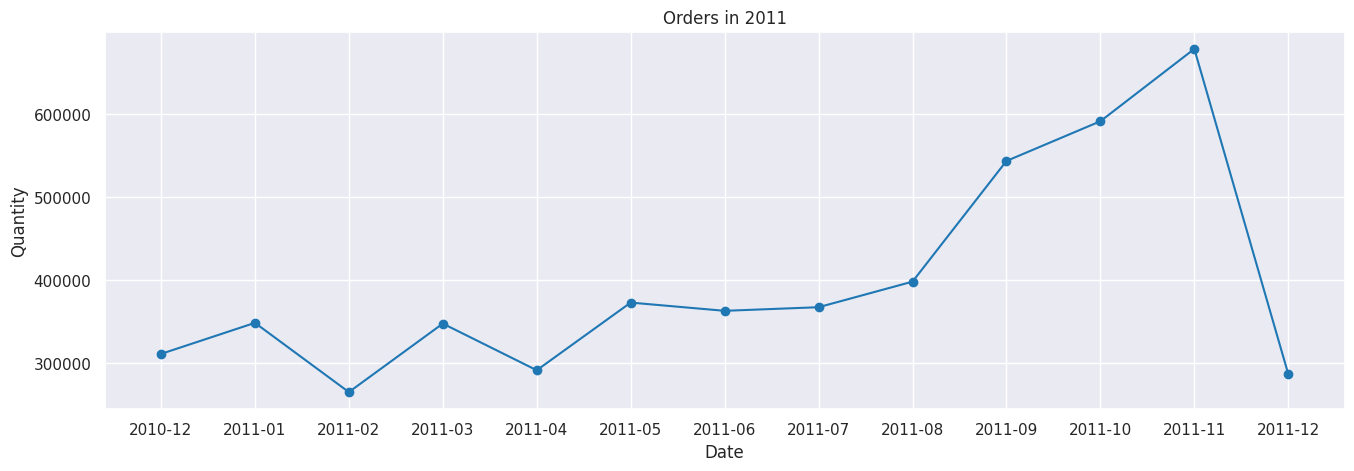

In [28]:
def plot_df(cust_data, x, y, title="", xlabel='Date', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()
plot_df(df_agg, x=df_agg.Date, y=df_agg.Quantity,title='Orders in 2011')

In [29]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

In [30]:
# Counting unique value of Description name as higher count comes first
Description_df=cust_data['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2016
1            REGENCY CAKESTAND 3 TIER   1714
2             JUMBO BAG RED RETROSPOT   1615
3       ASSORTED COLOUR BIRD ORNAMENT   1395
4                       PARTY BUNTING   1390

In [31]:
#visualization of count of description name
plt.figure(figsize=(18,5))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

In [32]:
#least count of description name
Description_df.tail()

Description_Name  Count
3872         GREEN WITH METAL BAG CHARM      1
3873         WHITE WITH METAL BAG CHARM      1
3874  BLUE/NAT SHELL NECKLACE W PENDANT      1
3875            PINK EASTER HENS+FLOWER      1
3876        PAPER CRAFT , LITTLE BIRDIE      1

## Country

In [33]:
# Counting unique value of country_name as higher count comes first
country_df=cust_data['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()

Country_Name   Count
0  United Kingdom  349227
1         Germany    9027
2          France    8327
3            EIRE    7228
4           Spain    2480

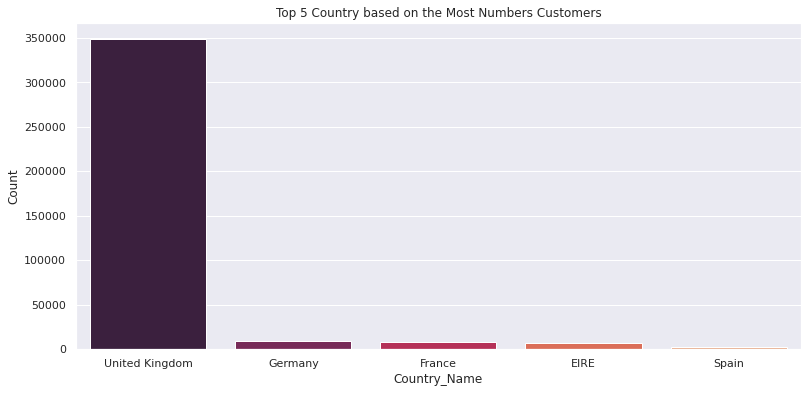

In [34]:
#visualization of 'Top 5 Country based Most Numbers of  Customers'
plt.figure(figsize=(13,6))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',palette= 'rocket', data=country_df[:5])

In [35]:
country_count = cust_data.groupby('Country')['InvoiceNo'].count().reset_index()
## From country_count variable finding top 10 countries
Top_ten_country = country_count.sort_values('InvoiceNo', ascending=False, ignore_index=True).head(10)
Top_ten_country


Country  InvoiceNo
0  United Kingdom     349227
1         Germany       9027
2          France       8327
3            EIRE       7228
4           Spain       2480
5     Netherlands       2363
6         Belgium       2031
7     Switzerland       1842
8        Portugal       1453
9       Australia       1184

In [36]:
## Adding country percentage column to top 10 countries data frame
Top_ten_country['Country_percent']= Top_ten_country['InvoiceNo']*100/cust_data['InvoiceNo'].count()

In [37]:
Top_ten_country

Country  InvoiceNo  Country_percent
0  United Kingdom     349227        88.922471
1         Germany       9027         2.298514
2          France       8327         2.120275
3            EIRE       7228         1.840441
4           Spain       2480         0.631474
5     Netherlands       2363         0.601683
6         Belgium       2031         0.517147
7     Switzerland       1842         0.469022
8        Portugal       1453         0.369972
9       Australia       1184         0.301478

In [38]:
country_df.tail()

Country_Name  Count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     25
35         Bahrain     17
36    Saudi Arabia      9

Plotting graph for top 10 countries

In [39]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=Top_ten_country['Country']
y=Top_ten_country['Country_percent']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("% Order", size=20)
plt.title("% Order from each Country", size=30)

## Showing the plot
plt.show()


**This graph indicates that most of the customers come from the United Kingdom, Germany, France, Ireland and Spain**

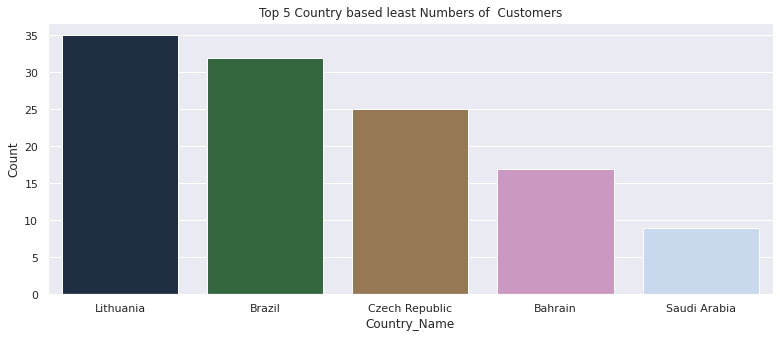

In [40]:
#visualization of 'Top 5 Country based least Numbers of  Customers'
plt.figure(figsize=(13,5))
plt.title('Top 5 Country based least Numbers of  Customers'), 
sns.barplot(x='Country_Name',y='Count',palette= 'cubehelix',data=country_df[-5:])

#**Feature engineering**

In [41]:
#extracting Invoice Date
cust_data["InvoiceDate"] = pd.to_datetime(cust_data["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

###**Date-time formatting of InvoiceDate columns**

In [42]:
#getting Day as feature
cust_data['Day']=cust_data['InvoiceDate'].dt.day_name()

###**The day from the invoice date should be added as a new feature**

In [43]:
# Create some new features from Invoicedate like hours,year,month_num,day_num
cust_data["year"] = cust_data["InvoiceDate"].apply(lambda x: x.year)
cust_data["month_num"] = cust_data["InvoiceDate"].apply(lambda x: x.month)
cust_data["day_num"] = cust_data["InvoiceDate"].apply(lambda x: x.day)
cust_data["hour"] = cust_data["InvoiceDate"].apply(lambda x: x.hour)
cust_data["minute"] = cust_data["InvoiceDate"].apply(lambda x: x.minute)

In [44]:
cust_data.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   InvoiceYearMonth     Date        Day  year  month_num  day_num  hour  \
0            201012  2010-12  Wednesday  2010         12        1     8   
1            201012  2010-12  Wednesday  2010         12        1     8   

   minute  
0      26  
1      26

###**Create some new features from Invoicedate like hours, year, month_num, day_num**

In [45]:
#creating new feature (TotalAmount)
cust_data['TotalAmount']=cust_data['Quantity']*cust_data['UnitPrice']

###**Create a new features TotalAmount from product of Quantity and Unitprice**

In [46]:
# adding month name feature from Invoice Date feature
cust_data['Month']=cust_data['InvoiceDate'].dt.month_name()

In [47]:
#checking changes
cust_data.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   InvoiceYearMonth     Date        Day  year  month_num  day_num  hour  \
0            201012  2010-12  Wednesday  2010         12        1     8   
1            201012  2010-12  Wednesday  2010         12        1     8   

   minute  TotalAmount     Month  
0      26        15.30  December  
1      26        20.34  December

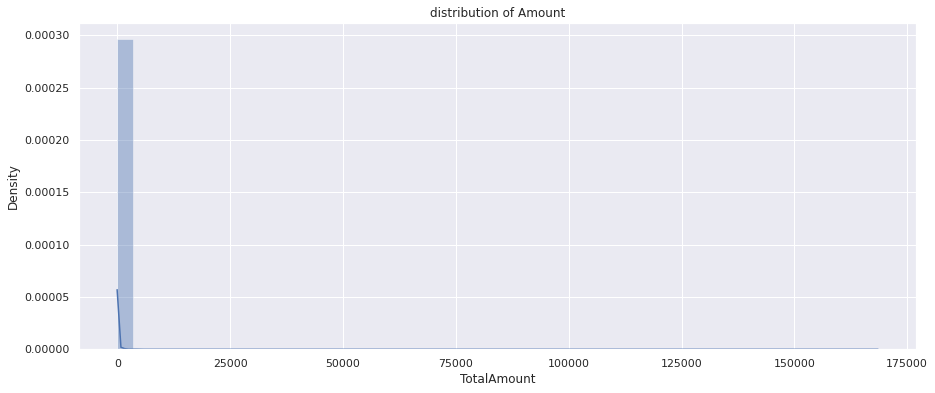

In [48]:
#checking distribution of Total amount
plt.figure(figsize=(15,6))
plt.title('distribution of Amount')
sns.distplot(cust_data['TotalAmount'],color="B")

In [49]:
#get more clear view of Total Amount
cust_data['TotalAmount'].describe()

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

It seems there can be outliers in Total Amount

In [50]:
#visualizing Total amount
plt.figure(figsize=(13,5))
cust_data['TotalAmount'].describe().plot()

In [51]:
#counting which day has highest count
day_df=cust_data['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

Day_Name  Count
0   Thursday  79260
1  Wednesday  68043
2    Tuesday  65747
3     Monday  64237
4     Sunday  61214
5     Friday  54231

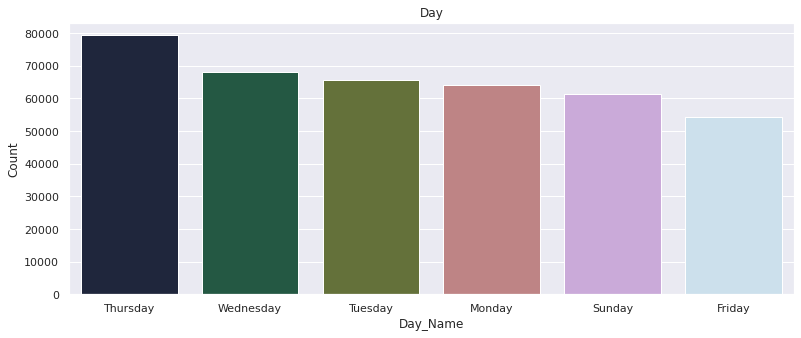

In [52]:
# visualization of counting of 'which day has highest count'
plt.figure(figsize=(13,5))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',palette= 'cubehelix',data=day_df)


###**The Invoicedate can be extended with new features such as hours, month, day, and year**

In [53]:
#counting which month has highest count
month_df=cust_data['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

Month_Name  Count
0    November  63182
1     October  48796
2    December  42699
3   September  39671
4         May  28075
5        June  26926
6       March  26872
7      August  26796
8        July  26582
9       April  22435
10    January  20991
11   February  19707

In [54]:
# visualization on the basis of months
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

**most numbers of customers have purchesed the gifts in the month of November, October, December and  September. Less numbers of customers have purchesed the gifts in the month of April, January and February**

In [55]:
# Counting which hour is the most productive for us
hour_df=cust_data['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

Hour_Name  Count
0          12  70942
1          13  63024
2          14  53260
3          11  48373
4          15  44793
5          10  37775
6          16  23719
7           9  21928
8          17  12942
9           8   8688
10         19   3234
11         18   2896
12         20    778
13          7    379
14          6      1

In [56]:
# visualization of hours
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

###**From this graph we can see that in AfterNoon Time most of the customers have purchased items. 12th hour is the time where we can see most purchases.**

In [57]:
# clustering timings into a specific category
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [58]:
#processing time type
cust_data['Time_type']=cust_data['hour'].apply(time_type)

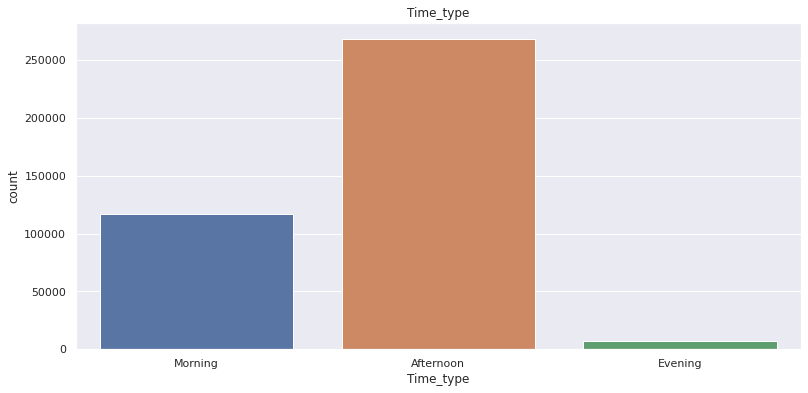

In [59]:
#visualization of purchases on the basis of time type
plt.figure(figsize=(13,6))
plt.title('Time_type')
sns.countplot(x='Time_type',data=cust_data)

###**Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in Evening**

In [60]:
#taking look
cust_data.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   InvoiceYearMonth     Date        Day  year  month_num  day_num  hour  \
0            201012  2010-12  Wednesday  2010         12        1     8   
1            201012  2010-12  Wednesday  2010         12        1     8   

   minute  TotalAmount     Month Time_type  
0      26        15.30  December   Morning  
1      26        20.34  December   Morning

In [61]:
from datetime import datetime, timedelta
reference_date = cust_data.InvoiceDate.max()

#timedelta function returns to total number of seconds
reference_date = reference_date + timedelta(days=1)

print(cust_data.InvoiceDate.max(), cust_data.InvoiceDate.min())
reference_date
 
 

2011-12-09 12:50:00 2010-12-01 08:26:00


Timestamp('2011-12-10 12:50:00')

We will construct a reference variable as number of days before the reference date when a customer last made a purchase.

In [62]:
cust_data['days_since_last_purchase'] = reference_date- cust_data.InvoiceDate
cust_data['days_since_last_purchase_num'] = cust_data['days_since_last_purchase'].astype('timedelta64[D]')
cust_data['days_since_last_purchase_num'].head() 

0    374.0
1    374.0
2    374.0
3    374.0
4    374.0
Name: days_since_last_purchase_num, dtype: float64

In [63]:
customer_history_df = cust_data.groupby('CustomerID')['days_since_last_purchase_num'].min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase_num':'Recency'}, inplace=True)
customer_history_df.head()

CustomerID  Recency
0     12346.0    326.0
1     12347.0      2.0
2     12348.0     75.0
3     12349.0     19.0
4     12350.0    310.0

In [64]:
customer_history_df.describe()

CustomerID      Recency
count   4339.000000  4339.000000
mean   15299.936852    92.518322
std     1721.889758   100.009747
min    12346.000000     1.000000
25%    13812.500000    18.000000
50%    15299.000000    51.000000
75%    16778.500000   142.000000
max    18287.000000   374.000000

**Frequency and Monetary value**

In [65]:
cust_data['Monetary'] = cust_data['Quantity']*cust_data['UnitPrice']

In [66]:
customer_monetary_val = cust_data[['CustomerID','Monetary']].groupby('CustomerID').sum().reset_index()
customer_monetary_val.head()

CustomerID  Monetary
0     12346.0  77183.60
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40

In [67]:

cust_arch_df=customer_history_df.merge(customer_monetary_val,how='outer')
cust_arch_df.head()

CustomerID  Recency  Monetary
0     12346.0    326.0  77183.60
1     12347.0      2.0   4310.00
2     12348.0     75.0   1797.24
3     12349.0     19.0   1757.55
4     12350.0    310.0    334.40

In [68]:
customer_freq = cust_data[['CustomerID','Monetary']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'Monetary':'Frequency'},inplace=True)
customer_freq.head()

CustomerID  Frequency
0     12346.0          1
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17

In [69]:
cust_archive_df=cust_arch_df.merge(customer_freq,how='outer')
cust_archive_df.head()

CustomerID  Recency  Monetary  Frequency
0     12346.0    326.0  77183.60          1
1     12347.0      2.0   4310.00        182
2     12348.0     75.0   1797.24         31
3     12349.0     19.0   1757.55         73
4     12350.0    310.0    334.40         17

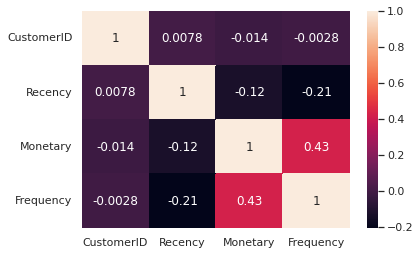

In [70]:
#Heatmap check
sns.heatmap(cust_archive_df.corr(), annot=True);

In [71]:
#Descriptive Statistics (Recency)
cust_archive_df.Recency.describe()

count    4339.000000
mean       92.518322
std       100.009747
min         1.000000
25%        18.000000
50%        51.000000
75%       142.000000
max       374.000000
Name: Recency, dtype: float64

In [72]:
#Recency distribution plot
import seaborn as sns
x = cust_archive_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [73]:
#Descriptive Statistics (Frequency)
cust_archive_df.Frequency.describe()

count    4339.000000
mean       90.512100
std       225.515328
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

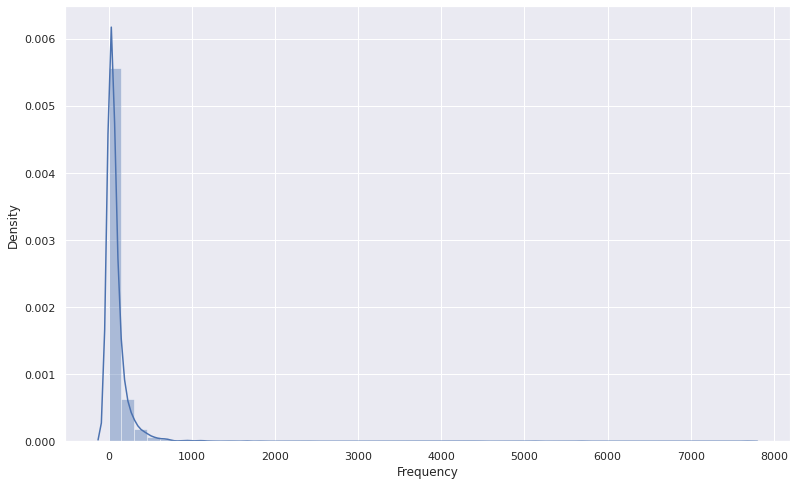

In [74]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = cust_archive_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [75]:
 #Descriptive Statistics (Monetary)
cust_archive_df.Monetary.describe()

count      4339.000000
mean       2048.215924
std        8984.248352
min           0.000000
25%         306.455000
50%         668.560000
75%        1660.315000
max      280206.020000
Name: Monetary, dtype: float64

In [76]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x =cust_archive_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [77]:
#Split into four segments using quantiles
quantiles = cust_archive_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [78]:
quantiles

{'CustomerID': {0.25: 13812.5, 0.5: 15299.0, 0.75: 16778.5},
 'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.0},
 'Monetary': {0.25: 306.455, 0.5: 668.5600000000001, 0.75: 1660.315},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0}}

In [79]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [80]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
cust_archive_df['R'] = cust_archive_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
cust_archive_df['F'] = cust_archive_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
cust_archive_df['M'] = cust_archive_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
cust_archive_df.head()

CustomerID  Recency  Monetary  Frequency  R  F  M
0     12346.0    326.0  77183.60          1  4  4  1
1     12347.0      2.0   4310.00        182  1  1  1
2     12348.0     75.0   1797.24         31  3  3  1
3     12349.0     19.0   1757.55         73  2  2  1
4     12350.0    310.0    334.40         17  4  4  3

In [81]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
cust_archive_df['RFMGroup'] = cust_archive_df.R.map(str) + cust_archive_df.F.map(str) + cust_archive_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
cust_archive_df['RFMScore'] = cust_archive_df[['R', 'F', 'M']].sum(axis = 1)
cust_archive_df.head()

CustomerID  Recency  Monetary  Frequency  R  F  M RFMGroup  RFMScore
0     12346.0    326.0  77183.60          1  4  4  1      441         9
1     12347.0      2.0   4310.00        182  1  1  1      111         3
2     12348.0     75.0   1797.24         31  3  3  1      331         7
3     12349.0     19.0   1757.55         73  2  2  1      221         5
4     12350.0    310.0    334.40         17  4  4  3      443        11

In [82]:
 #Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
cust_archive_df['Recency'] = [handle_neg_n_zero(x) for x in cust_archive_df.Recency]
cust_archive_df['Monetary'] = [handle_neg_n_zero(x) for x in cust_archive_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = cust_archive_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [83]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

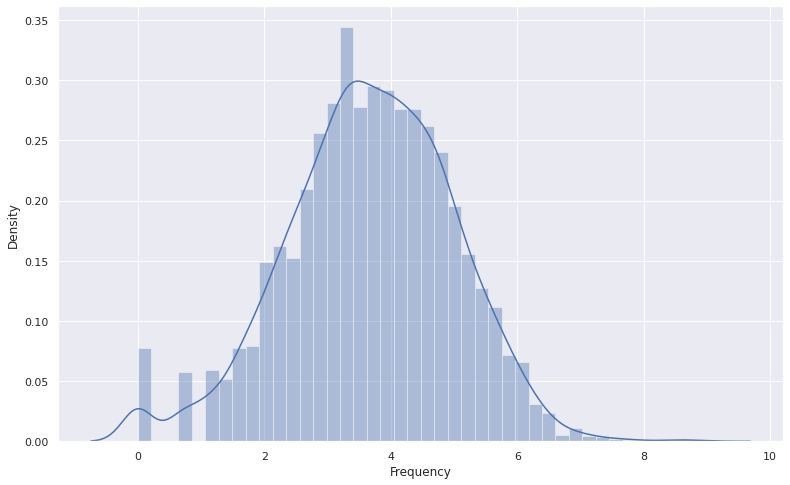

In [84]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

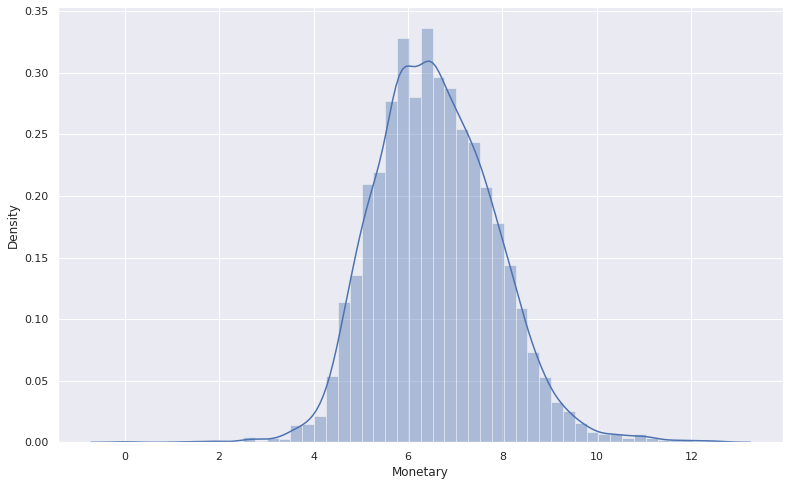

In [85]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [86]:
from sklearn import preprocessing
cust_archive_df['Recency_log'] = cust_archive_df['Recency'].apply(math.log)
cust_archive_df['Frequency_log'] = cust_archive_df['Frequency'].apply(math.log)
cust_archive_df['Monetary_log'] = cust_archive_df['Monetary'].apply(math.log)

# Model Overview

K-Means with silhouette score for RM

K-Means with Elbow method FOR RM

DBSCAN for RM

K-Means with silhouette score for FM

K-Means with Elbow method for FM

DBSCAN for FM

K-Means with silhouette score  for RFM

K-Means with Elbow method for RFM

Hierarchical clustering for RFM

DBSCAN for RFM

#**K-Means Clustering**

#**Applying Silhouette Score Method on Recency and Monetary**

In [87]:
# Silhouette score method
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=cust_archive_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4199159443358626
For n_clusters = 3, silhouette score is 0.3400182415435806
For n_clusters = 4, silhouette score is 0.3622714854600872
For n_clusters = 5, silhouette score is 0.33353082645385684
For n_clusters = 6, silhouette score is 0.3433378055842204
For n_clusters = 7, silhouette score is 0.3398830331156599
For n_clusters = 8, silhouette score is 0.33562229660611087
For n_clusters = 9, silhouette score is 0.3450143011534026
For n_clusters = 10, silhouette score is 0.34696804973086914
For n_clusters = 11, silhouette score is 0.33689481562022
For n_clusters = 12, silhouette score is 0.3437866441834845
For n_clusters = 13, silhouette score is 0.3385701893139884
For n_clusters = 14, silhouette score is 0.33907352614437997
For n_clusters = 15, silhouette score is 0.335706002758569


#**Calculation of Silhouette score**

### Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* ### Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* ### Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

### The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

#**Applying Elbow Method on Recency and Monetary**


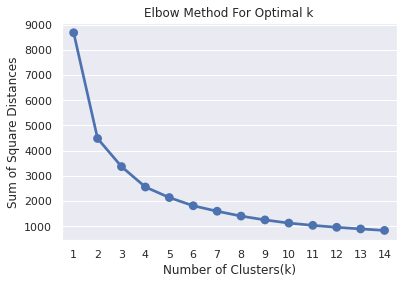

In [88]:
# Elbow Method on Recency and Monetary
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=cust_archive_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [89]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

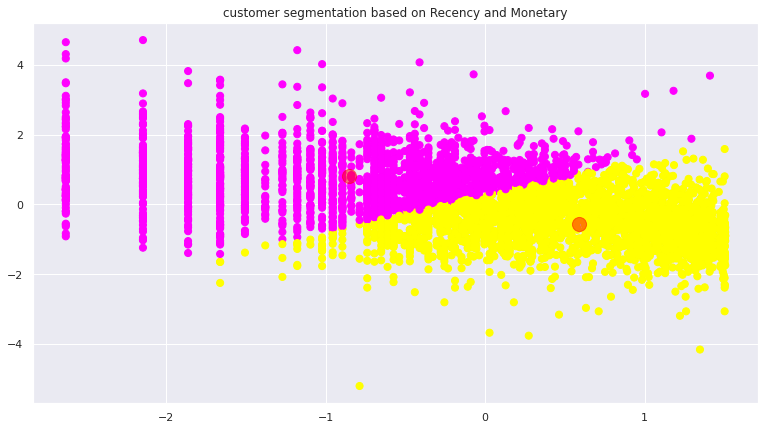

In [90]:
plt.figure(figsize=(13,7))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

###**We can observe that ,Customers are well separated when we cluster them by Recency and Monetary**

#**Applying DBSCAN  on Recency and Monetary**

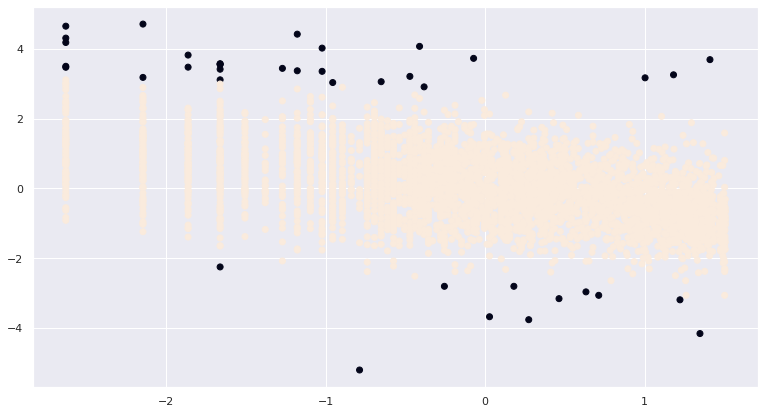

In [91]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,7))
plt.scatter(X[:,0], X[:,1], c=y_pred)

###**From above plot, we can observe that Customers are well separated when we cluster them by Recency and Monetary**

#**Applying silhouette Score  Method on Frquency and Monetary**

In [92]:
# silhouette Score Method on Frquency and Monetary
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=cust_archive_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4784099179679686
For n_clusters = 3, silhouette score is 0.40773733472250534
For n_clusters = 4, silhouette score is 0.3723105945030246
For n_clusters = 5, silhouette score is 0.3469909936041524
For n_clusters = 6, silhouette score is 0.36071333771647535
For n_clusters = 7, silhouette score is 0.3450877365954336
For n_clusters = 8, silhouette score is 0.34888236675921963
For n_clusters = 9, silhouette score is 0.34704178075105496
For n_clusters = 10, silhouette score is 0.35905253310882623
For n_clusters = 11, silhouette score is 0.36735256566354996
For n_clusters = 12, silhouette score is 0.3543505131930171
For n_clusters = 13, silhouette score is 0.36249885467056037
For n_clusters = 14, silhouette score is 0.35904174032370845
For n_clusters = 15, silhouette score is 0.35870069616660927


#**Applying Elbow Method on Frequency and Monetary**


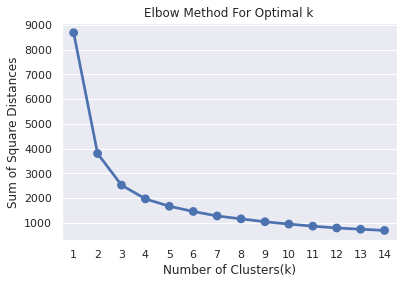

In [93]:
# Elbow Method on Frequency and Monetary
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [94]:
#fitting Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [95]:
#visualization of customer segmentation based on   Frequency and Monetary
plt.figure(figsize=(15,7))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

###**From above plot we can say that Customers are well separated when we cluster them by Frequency and Monetary**

#**Applying DBSCAN to Method on Frequency and Monetary**

In [96]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,7))
plt.scatter(X[:,0], X[:,1], c=y_pred)

##**So, Customers are well separated when we cluster them by Frequency and Monetary**

In [97]:
#plot (R vs M and F vs M)
plt.figure(figsize=(13,7))
plt.title('R vs M and F vs M')
plt.scatter(cust_archive_df.Recency_log,cust_archive_df.Monetary_log,alpha=0.5)
plt.scatter(cust_archive_df.Frequency_log,cust_archive_df.Monetary_log,alpha=0.5)

### **We got no major insight by plotting this graph. So, let's plot 3D visualization and observe insights.**

#**3D visualization of Recency ,Frequency and Monetary**

In [98]:
# 3D visualization 
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(13,8))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=cust_archive_df.Recency_log
ys=cust_archive_df.Frequency_log
zs=cust_archive_df.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

Here we tried to find relation between Recency ,Frequency and Monetary by 3D visualization.

#**Applying Silhouette  Method on Recency ,Frequency and Monetary**

In [99]:
# Recency ,Frequency and Monetary
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=cust_archive_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.39469123089738556
For n_clusters = 3 The average silhouette_score is : 0.30332817807594054
For n_clusters = 4 The average silhouette_score is : 0.30300770081412526
For n_clusters = 5 The average silhouette_score is : 0.2777949179920577
For n_clusters = 6 The average silhouette_score is : 0.27666486866111356
For n_clusters = 7 The average silhouette_score is : 0.26380548233507184
For n_clusters = 8 The average silhouette_score is : 0.2612009555173074
For n_clusters = 9 The average silhouette_score is : 0.2520400592422546
For n_clusters = 10 The average silhouette_score is : 0.26062589614593334
For n_clusters = 11 The average silhouette_score is : 0.26194150274456374
For n_clusters = 12 The average silhouette_score is : 0.26382467538057025
For n_clusters = 13 The average silhouette_score is : 0.26246719449043165
For n_clusters = 14 The average silhouette_score is : 0.26083962512212205
For n_clusters = 15 The average silhouette_score 

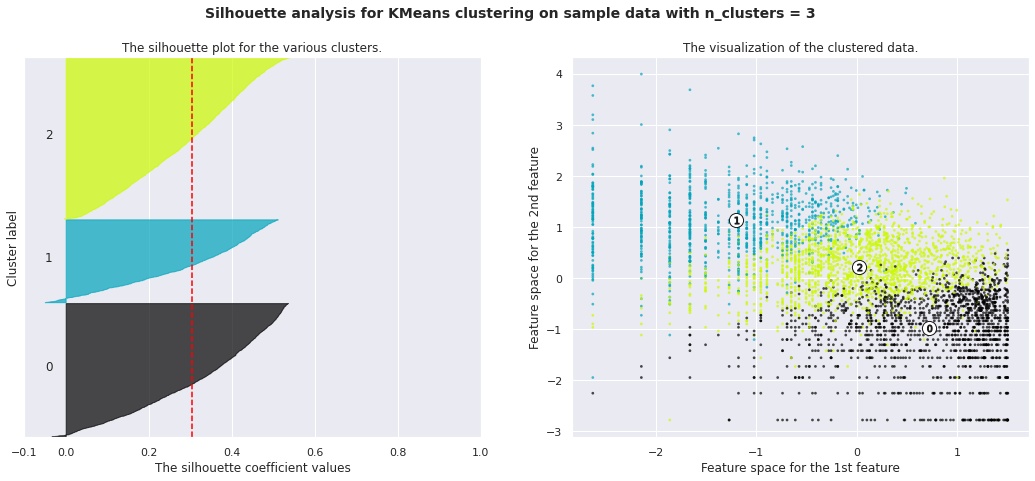

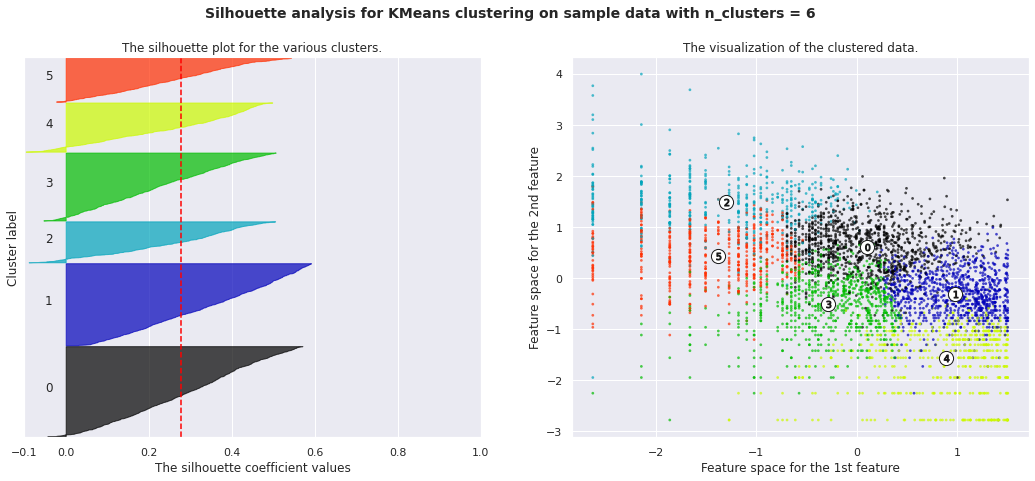

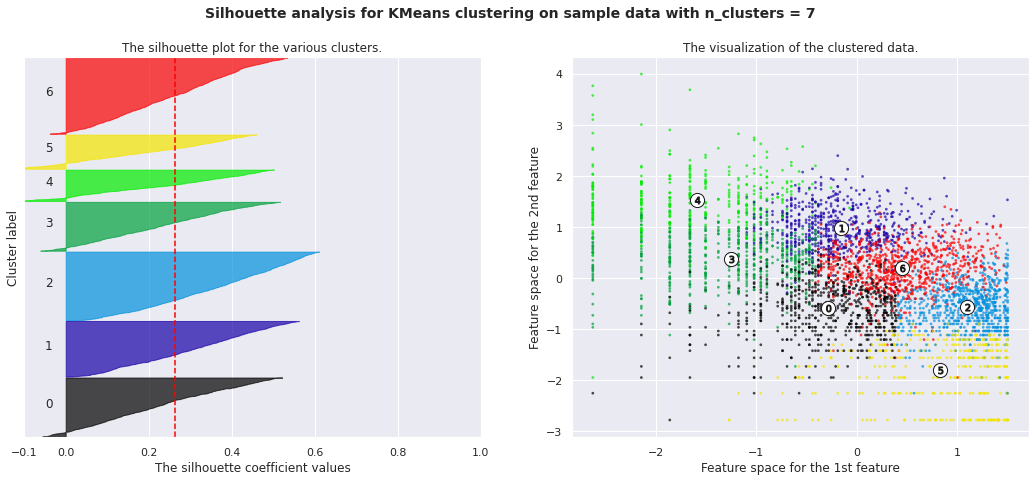

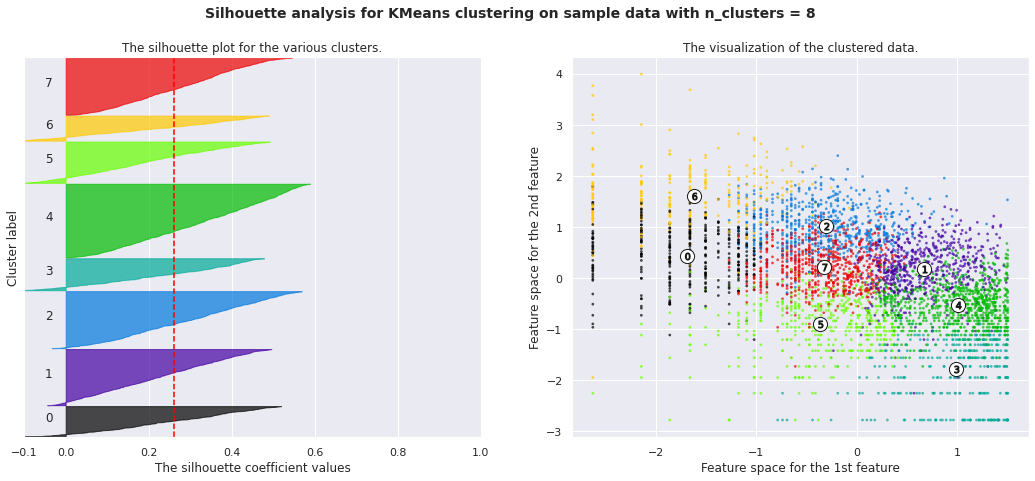

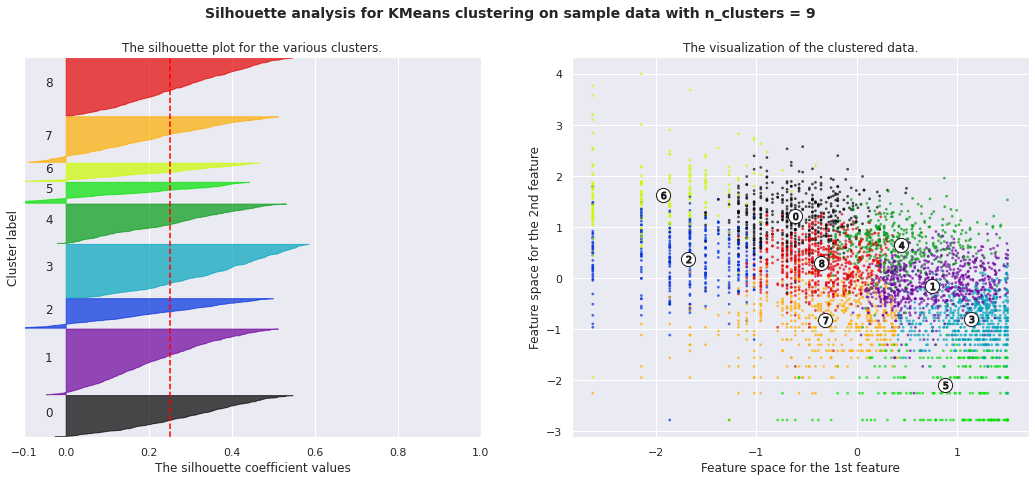

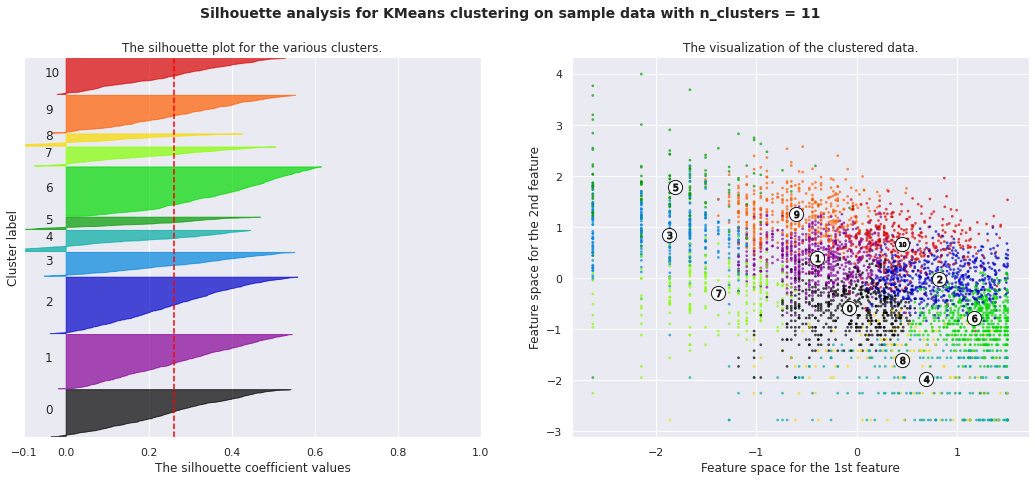

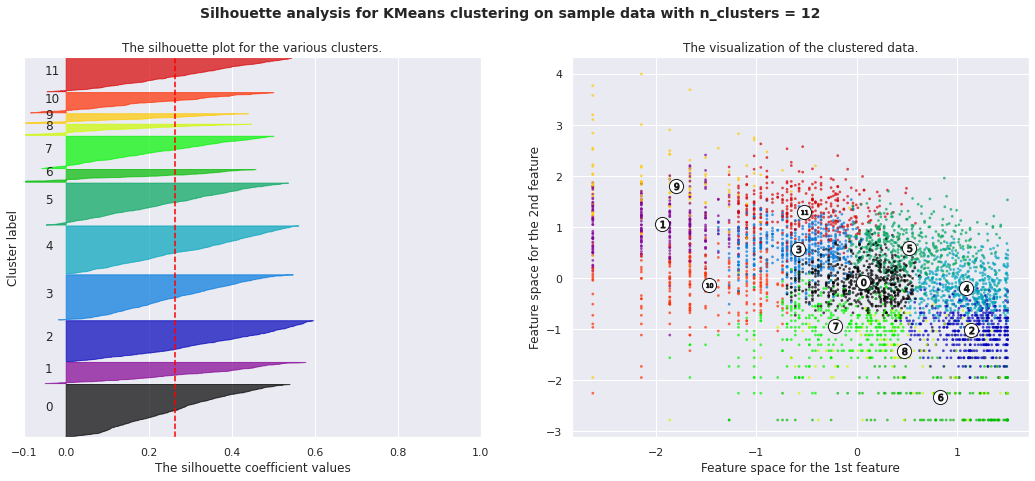

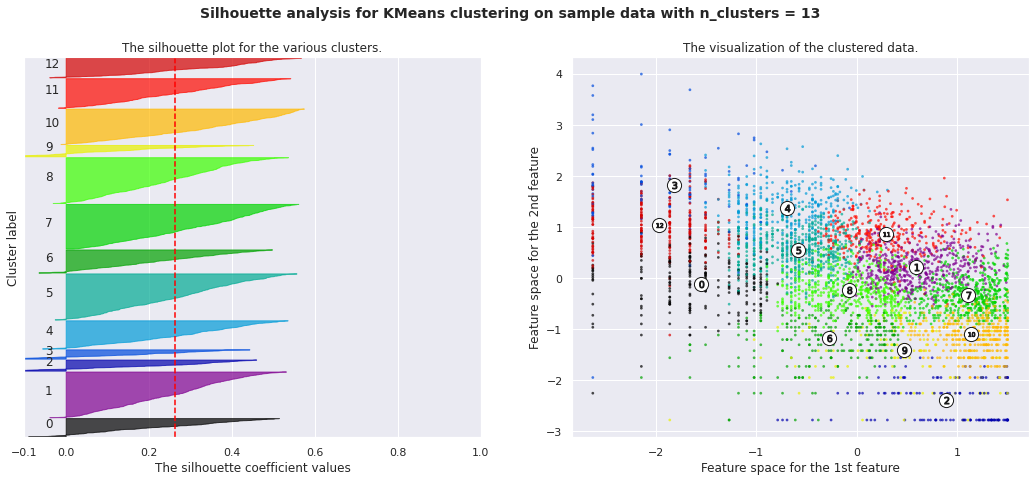

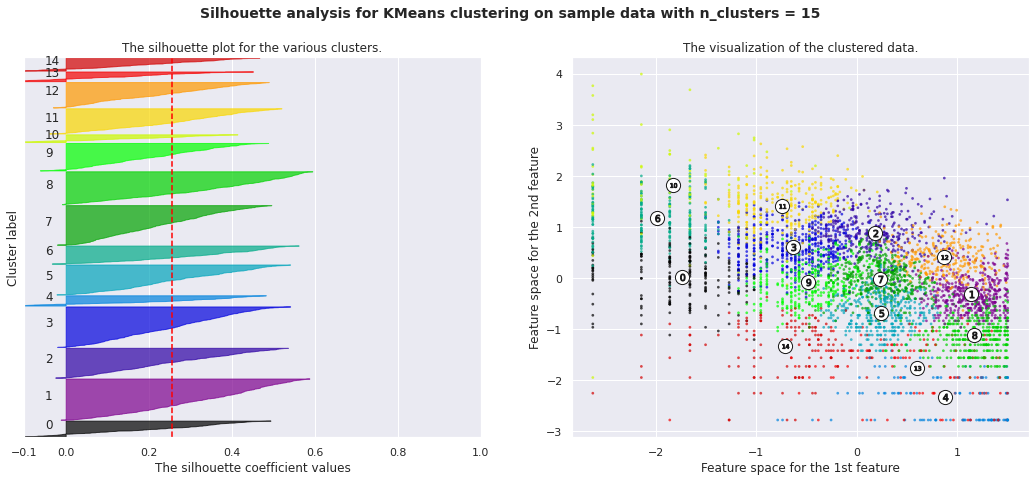

In [100]:
# Applying Silhouette Method
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [101]:
# fitting kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [102]:
#visualization
plt.figure(figsize=(13,8))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

###**We can see that, Customers are well separated when we cluster them by Recency ,Frequency and Monetary**

#**Applying Elbow Method on Recency ,Frequency and Monetary**


In [103]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [104]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the df
cust_archive_df['Cluster'] = KMean_clust.labels_
cust_archive_df.head(10)

CustomerID  Recency  Monetary  Frequency  R  F  M RFMGroup  RFMScore  \
0     12346.0    326.0  77183.60          1  4  4  1      441         9   
1     12347.0      2.0   4310.00        182  1  1  1      111         3   
2     12348.0     75.0   1797.24         31  3  3  1      331         7   
3     12349.0     19.0   1757.55         73  2  2  1      221         5   
4     12350.0    310.0    334.40         17  4  4  3      443        11   
5     12352.0     36.0   2506.04         85  2  2  1      221         5   
6     12353.0    204.0     89.00          4  4  4  4      444        12   
7     12354.0    232.0   1079.40         58  4  2  2      422         8   
8     12355.0    214.0    459.40         13  4  4  3      443        11   
9     12356.0     23.0   2811.43         59  2  2  1      221         5   

   Recency_log  Frequency_log  Monetary_log  Cluster  
0     5.786897       0.000000     11.253942        1  
1     0.693147       5.204007      8.368693        0  
2     4.317488       3.433987      7.494007        1  
3     2.944439       4.290459      7.471676        0  
4     5.736572       2.833213      5.812338        1  
5     3.583519       4.442651      7.826459        0  
6     5.318120       1.386294      4.488636        1  
7     5.446737       4.060443      6.984161        1  
8     5.365976       2.564949      6.129921        1  
9     3.135494       4.077537      7.941449        0

#**Dendogram to find the optimal number of clusters**

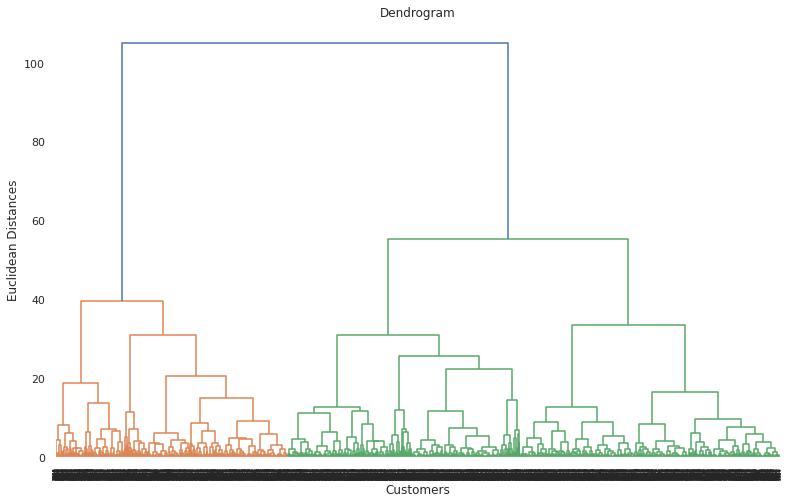

In [105]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

#**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90**

#**No. of Cluster = 2**

In [106]:
# Fitting hierarchical clustering to the mall df
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

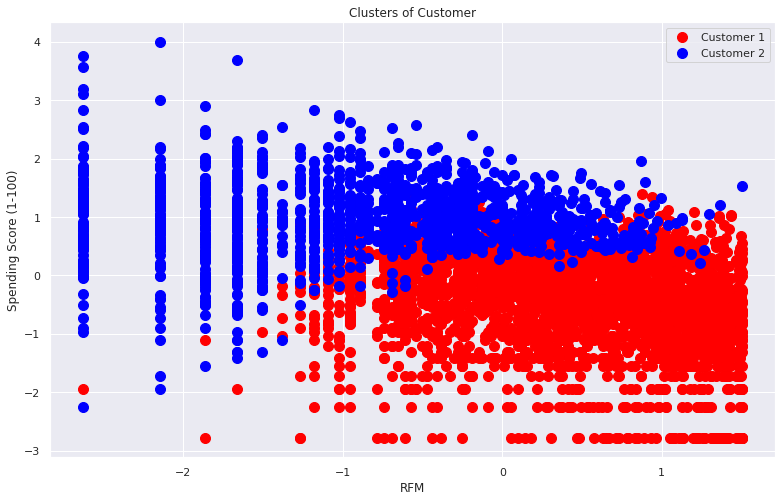

In [107]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#**By applying different clustering algorithem to our dataset. We got the optimal number of cluster is equal to 2**

#**Applying DBSCAN to Recency, Frequency and Monetary**

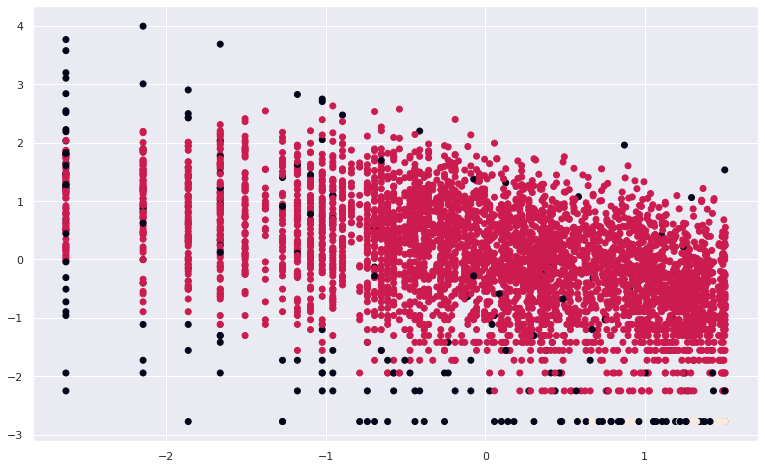

In [108]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

###**Customers are well separated when we cluster them by Recency, Frequency and Monetary and optimal number of cluster is equal to 3**


#**Summary**

In [109]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow method  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow method  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow method  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow method     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow method     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow method     | RFM  |             2             |
|   9    |   Hierarchical clustering      | RFM  |             2             |
|   10   |            DBSCAN              | RFM  |  

# **Conclusion:**
Descriptive Analysis
Exploring the Online customer segmentation dataset reveals:
* There were several missing and duplicate values.

* The majority of purchases come from the United Kingdom.
Generally, customers have purchased items on Tuesday, Thursday, and Wednesday.
* Among the top three months for purchases were November, October, and December, with the least number of purchases occurring in April, January, and February.
*The majority of customers make purchases in the afternoon. Items are most commonly purchased during the 12th hour of the day.


As part of our investigations, we checked that there were no null values and no duplicate values in the dataset. Following that, prepare the data set for exploratory data analysis. Our next step was feature engineering, in which we extracted the DateTime column to get some other useful columns. Furthermore, we created a new variable named Total amount. As a result, we prepared our data for modeling. We then developed the RFM model (Recency, Frequency, Monetary Value). For better results, R, F, and M were transformed into logarithms.

The next step is to build the model. We used the K-Means clustering algorithm to identify the optimal number of clusters based on customer purchase behavior. The Silhouette Score Method and K-Means were then applied simultaneously to RM, FM, and RFM. In this case, we were able to get the optimal number of clusters = 2. A scatterplot was then used to visualize our results. On the RM, FM, and RFM simultaneously, we used K-Means with the Elbow Method. We then applied DBSCAN to RM, FM, and RFM where we got the optimal number of clusters as 2, 2, 3 simultaneously. After that, Dendrogram was used to determine the optimal number of clusters ..

###**Based on different algorithms, 2 clusters are the optimal number.**